<table align="left" style="border-style: hidden" class="table"> <tr><td class="col-md-2"><img style="float" src="http://prob140.org/assets/icon256.png" alt="Prob140 Logo" style="width: 120px;"/></td><td><div align="left"><h3 style="margin-top: 0;">Probability for Data Science</h3><h4 style="margin-top: 20px;">UC Berkeley, Fall 2019</h4><p>Ani Adhikari and Jim Pitman</p>CC BY-NC 4.0</div></td></tr></table><!-- not in pdf -->

In [1]:
# HIDDEN
from datascience import *
from prob140 import *
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
from scipy import stats

# Homework 14

### 1. 2017 SAT Scores, Part 1 ###
The College Board presents an [annual report](https://reports.collegeboard.org/pdf/2017-total-group-sat-suite-assessments-annual-report.pdf) about participation and performance in the SAT. The 2017 SAT had two parts: Evidence-Based Reading and Writing (ERW) and Math. It is generally believed that the joint distribution of ERW and Math scores of test-takers in any given year is roughly bivariate normal. This can only be a rough approximation because SAT scores aren't continuous variables. But let's make a lazy choice for this exercise: pretend that SAT scores are continuous and that the approximation is exact.

So assume that for the 2017 test-takers in the United States, the joint distribution of ERW and Math scores is bivariate normal. The College Board provides the following summary statistics.

- ERW: Mean 533, SD 100
- Math: Mean 527, SD 107
- Total: Mean 1060, SD 195

Let $R$ be the ERW score and $M$ the math score of a test-taker picked at random.

**a)** Find the correlation $r(R, M)$.

In [2]:
# Answer to 1a
var_R = 100**2
var_M = 107**2
var_T = 195**2
r = ((var_T-var_R-var_M)/2)/(100*107)
r

0.7745794392523364

**b)** Plot the joint density surface of $R$ and $M$. The call is `Plot_bivariate_normal(mu, cov)` where the mean vector `mu` is a list and the covariance matrix `cov` is a list of lists specifying the rows.

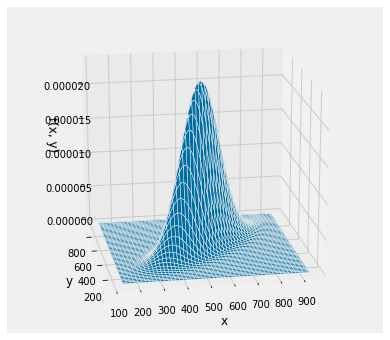

In [3]:
# Answer to 1b

mu = [533, 527]
cov_RM = (var_T-var_R-var_M)/2
cov = [[var_R, cov_RM], [cov_RM, var_M]]
Plot_bivariate_normal(mu, cov, figsize =(6,6))

**c) [WRITTEN & CODE]** Let $T = R+M$. In the code cell below, plot the joint density surface of $M$ and $T$. Use as many lines of code as you need. **On paper, explain** your choice of density, and say what you notice about the plot.

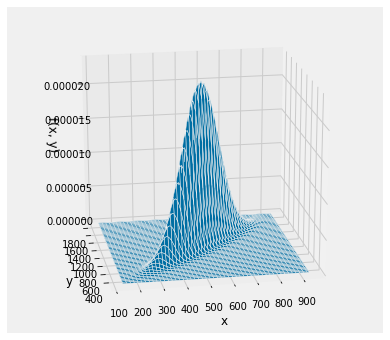

In [4]:
# Answer to 1c
mu = [533, 1060]
cov_RT = cov_RM+var_R
cov = [[var_R, cov_RT], [cov_RT, var_T]]
Plot_bivariate_normal(mu, cov, figsize =(6,6))

**d)** Write a code expression that evaluates to $r(M, T)$. In the comment, explain why it's high. 

In [5]:
# Answer to 1d
r_MT = (cov_RM + var_M)/(195*107)
print('r(M,T):',r_MT)
"""r(M, T) is high because the value of M directly affects the value of T which means that there is a strong linear

relationship between the two variables and thus a high correlation coefficient."""

r(M,T): 0.9459381739755571


'r(M, T) is high because the value of M directly affects the value of T which means that there is a strong linear\n\nrelationship between the two variables and thus a high correlation coefficient.'

### 2. 2017 SAT Scores, Part 2 ###
This exercise continues the previous one. Please make the same assumptions as before. In your math and code you can use any quantity that has already been defined.

As in the previous exercise, the parts below refer to the scores of a test-taker picked at random.

**a)** Write an expression that evaluates to the chance that the total score is greater than 1500.

In [6]:
# Answer to 2a
#T = norm(1060, 195**2) -> Z = (T-1060)/195 
#P(Z<=(T-1060)/195) = Φ((T-1060)/195), P(Z>(T-1060)/195) = 1-Φ((T-1060)/195)
1 - stats.norm.cdf((1500-1060)/195)

0.012022474952684048

**b) [WRITTEN & CODE]** In terms of the standard normal cdf $\Phi$, what is the chance that the student scored higher on ERW than on Math? Answer this on paper (show your work) and then use the code cell below to find the numerical value. Use as many lines of code as you need. The last expression should evaluate to the proportion.

In [7]:
# Answer to 2b
1-stats.norm.cdf((527-533)/(var_R + var_M - 2*cov_RM)**(1/2))

0.5342474813742879

**c)** Write a code expression that evaluates to the chance that the ERW and Math scores were more than 100 points apart. As before, your expression can involve quantities defined in earlier parts.

In [8]:
# Answer to 2c

(1-stats.norm.cdf((100 + 527-533)/(var_R + var_M - 2*cov_RM)**(1/2))) + (1-stats.norm.cdf((100 + 533-527)/(var_R + var_M - 2*cov_RM)**(1/2)))

0.15350636714191035

### 3. Heights of Mothers and Daughters ###

The heights of a population of mother-daughter pairs have a bivariate normal distribution with correlation 0.5.

**a)** Of the mothers on the 90th percentile of mothers' heights, what proportion have daughters who are taller than the 90th percentile of daughters' heights?

**b)** In what proportion of mother-daughter pairs are both women taller than average? (This means the mothers are taller than the average mother and the daughters are taller than the average daughter.)

[Hint: Remember that you can express standard bivariate normal variables in terms of two independent standard normal variables.]

In [20]:
#Part A:
print(1-stats.norm.cdf(0.64/0.866))

0.22994438335724876


### 4. Least Squares Linear Predictor
Suppose that $X$ is normal $(\mu_X, \sigma_X^2$), $Y$ is normal $(\mu_Y, \sigma_Y^2)$, and the two random variables are independent. Let $S = X+Y$.

**a)** Find the conditional distribution of $X$ given $S=s$.

**b)** Find the least squares predictor of $X$ based on $S$ and provide its mean squared error.

**c)** Find the least squares linear predictor of $X$ based on $S$ and provide its mean squared error.

### 5. Properties of Multiple Regression Estimates ##

This exercise assumes the multiple regression model of [Section 25.4](http://prob140.org/textbook/Chapter_25/04_Multiple_Regression.html) of the textbook and uses the same notation as in that section.

**a)** What are the dimensions of $E(\hat{\boldsymbol{\beta}})$? Show that $\hat{\boldsymbol{\beta}}$ is an unbiased estimator of $\boldsymbol{\beta}$.

**b)** Find the covariance matrix of $\hat{\boldsymbol{\beta}}$. The diagonal entries of this matrix tell you how variable the estimates of the coefficients are.

**c)** What is the distribution of $\hat{\boldsymbol{\beta}}$?

**d)** Find the distribution of the fitted values $\hat{\mathbf{Y}}$.

**e)** Find the distribution of the residuals $\mathbf{e}$.

## Submission Instructions ##

Many assignments throughout the course will have a written portion and a code portion. Please follow the directions below to properly submit both portions.

### Written Portion ###
*  Scan all the pages into a PDF. You can use any scanner or a phone using an application. Please **DO NOT** simply take pictures using your phone. 
* Please start a new page for each question. If you have already written multiple questions on the same page, you can crop the image or fold your page over (the old-fashioned way). This helps expedite grading.
* It is your responsibility to check that all the work on all the scanned pages is legible.

### Code Portion ###
* Save your notebook using File > Save and Checkpoint.
* Generate a PDF file using File > Download as > PDF via LaTeX. This might take a few seconds and will automatically download a PDF version of this notebook.
    * If you have issues, please make a follow-up post on the general HW 14 Piazza thread.
    
### Submitting ###
* Combine the PDFs from the written and code portions into one PDF.  [Here](https://smallpdf.com/merge-pdf) is a useful tool for doing so. 
* Submit the assignment to Homework 14 on Gradescope. 
* **Make sure to assign each page of your pdf to the correct question.**
* **It is your responsibility to verify that all of your work shows up in your final PDF submission.**


### **We will not grade assignments which do not have pages selected for each question.** 